Intro to multiple plots
=====================

In this notebook you will learn what multiple plots can do for you and what is the best way to create them.

## Multiple better than individual

The power of multiple plots is threefold:

- Multiple plot is just a coordinator. It doesn't hold any data related to it's childplots, which are full instances of `Plot` themselves. This allows you to **grab the separate child plots whenever you want**, as well as modifying only some of its child plots very easily.
- It will **create the layout for you** without requiring any effort on your side.
- If all your plots inside a multiple plot need to read from the same data, the plot will coordinate all plots so that they can share the data. Therefore, **data will be read only once, saving both time and memory**.

## Types of multiple plots

There are three ways of combining your plots in the visualization framework, each with its associated class:

- In the same plot (`MultiplePlot`): it's the most basic one. It just takes the traces from all plots and displays them in the same plot.
- As subplots (`SubPlots`): Creates a grid of subplots, where each item of the grid contains a plot. Uses [plotly's subplots capabilities](https://plotly.com/python/subplots/).
- As frames of an animation (`Animation`): Creates an animation where each child plot is represented in a frame. [plotly's animation capabilities](https://plotly.com/python/animations/).

In [1]:
from sisl.viz import MultiplePlot, Animation, SubPlots

Let's create a simple tight-binding model for the plots in this notebook.

In [2]:
import sisl
import numpy as np

r = np.linspace(0, 3.5, 50)
f = np.exp(-r)

orb = sisl.AtomicOrbital('2pzZ', (r, f))
geom = sisl.geom.graphene(orthogonal=True, atoms=sisl.Atom(6, orb))
geom = geom.move([0, 0, 5])
H = sisl.Hamiltonian(geom)
H.construct([(0.1, 1.44), (0, -2.7)], )

## Merging existing plots

This is the most simple way of creating a multiple plot: you just build your plots, and then pass them to the multiple plot constructor.

However, this will miss one key feature of multiple plots. Since you've created each plot separately, **each plot has its own data**, even if they would be able to share it.

Therefore, this is only recommended **when the plots are independent from each other**.

As an example, from the hamiltonian that we constructed, let's build a wavefunction plot and a pdos plot:

In [3]:
wf_plot = H.plot.wavefunction(i=1, axes=[0,1], transforms=["square"], zsmooth="best")
pdos_plot = H.plot.pdos(Erange=[-10,10])

plots = [wf_plot, pdos_plot]

MonkhorstPack.average:   0%|          | 0/5 [00:00<?, ?k/s]

And now, we will merge them. There are two main ways to do the merge:

- Calling the multiple plot class that we want to use (`MultiplePlot`, `Animation` or `Subplots`):

In [4]:
# You just pass the plots and then any extra arguments for the plot class (see help(SubPlots))
SubPlots(plots=plots, cols=2)

FigureWidget({
    'data': [{'showlegend': False,
              'type': 'heatmap',
              'uid': '9c5ff…

- Using the `merge` method that all plots have.

In [5]:
plots[0].merge(plots[1:], to="subplots", cols=2)

FigureWidget({
    'data': [{'showlegend': False,
              'type': 'heatmap',
              'uid': '6e301…

Both are exactly equivalent, but this second one is probably better since you don't need to import the class.

You do need to specify somehow how to merge the plots though! As you may have noticed, there's a `to` argument that lets you specify how you want the plots to be merged.

Here are the docs for `Plot.merge`:

In [6]:
help(plots[0].merge)

Help on method merge in module sisl.viz.plotly.plot:

merge(others, to='multiple', extend_multiples=True, **kwargs) method of sisl.viz.plotly.plots.grid.WavefunctionPlot instance
    Merges this plot's instance with the list of plots provided
    
    Parameters
    -------
    others: array-like of Plot() or Plot()
        the plots that we want to merge with this plot instance.
    to: {"multiple", "subplots", "animation"}, optional
        the merge method. Each option results in a different way of putting all the plots
        together:
        - "multiple": All plots are shown in the same canvas at the same time. Useful for direct
        comparison.
        - "subplots": The layout is divided in different subplots.
        - "animation": Each plot is converted into the frame of an animation.
    extend_multiples: boolean, optional
        if True, if `MultiplePlot`s are passed, they are splitted into their child_plots, so that the result
        is the merge of its child_plots wi

## Let `MultiplePlot` handle plot creation

As already mentioned, creating your plots beforehand is only a good strategy if plots are independent from each other, in the sense that they can not share data.

In cases where plots can share data, just let `MultiplePlot` create your plots. It is so easy that you will end up doing it in this way all the time, even in cases where it doesn't have efficiency benefits :)

Everytime you create a plot, there are three special keyword arguments that you can pass: `varying`, `animate` and `subplots`. These keywords let you easily initialize `MultiplePlot`, `Animation` and `Subplots` instances, respectively. 

They can be used in two ways:

- You can pass a dictionary with the keys of the settings that you want to vary and the value for each "step".

In [7]:
H.plot.wavefunction(axes=[0,1], transforms=["square"], animate={"i":[1,2], "zsmooth": ["best", False]})

ValueError: 
Frames are not supported by the plotly.graph_objs.FigureWidget class.
Note: Frames are supported by the plotly.graph_objs.Figure class

In this case we animated the wavefunction plot to see the squares of wavefunctions 1 and 2. The second one, for some reason, we wanted it to display "a bit" pixelated.

- You can also pass the list of values as regular settings and then inform the multiple plot keyword (in this case `subplots`) which settings to vary.

In [8]:
H.plot.wavefunction(
    colorscale=["temps", "portland", "peach", "viridis"], i=[0,1,2,3], axes=[0,1], transforms=["square"], zsmooth="best", 
    subplots=["colorscale", "i"], rows=2
) 

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

There you go, four wavefunctions, each one displayed in a different colorscale :)

Remember that these subplots are all sharing the same data, so the eigenstates of the hamiltonian have only been stored once!

------------------------------------------
This next cell is just to create a thumbnail

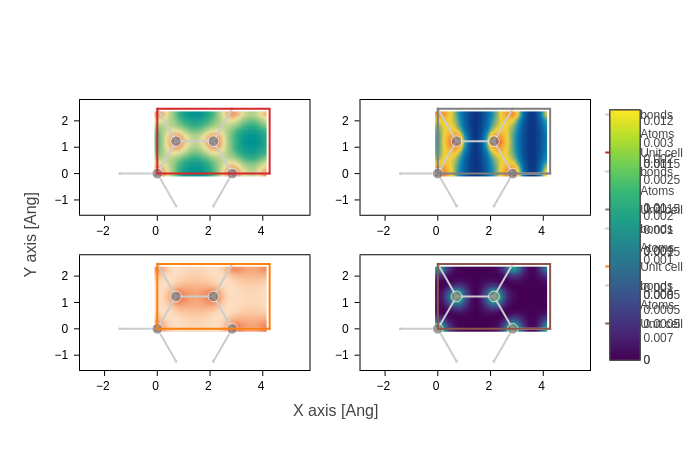

In [9]:
_.show("png")